<a href="https://colab.research.google.com/github/urstrulynishkarsh/churnPredictionModel/blob/main/final2ChurnPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import pickle
import warnings
warnings.filterwarnings('ignore')

In [4]:
data1=pd.read_csv("Dataset.csv")

In [5]:
data1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
print("shape of my data is: ",data1.shape)
print("column data is: ",data1.columns)

shape of my data is:  (7043, 21)
column data is:  Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [7]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Removing Unnecessary Columns

In [8]:
data1=data1.drop("customerID",axis="columns")

In [9]:
data1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [10]:
print("shape of my data is: ",data1.shape)
print("column data is: ",data1.columns)

shape of my data is:  (7043, 20)
column data is:  Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [11]:
data1.dtypes

,0
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object
OnlineBackup,object


In [12]:
#Now we are working on columns

print("columns are: \n")
def unique_columns(data1):
    for column in data1:
        if data1[column].dtype=='object':
            print(f'{column}:{data1[column].unique()}')

unique_columns(data1)

columns are: 

gender:['Female' 'Male']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No phone service' 'No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes' 'No internet service']
OnlineBackup:['Yes' 'No' 'No internet service']
DeviceProtection:['No' 'Yes' 'No internet service']
TechSupport:['No' 'Yes' 'No internet service']
StreamingTV:['No' 'Yes' 'No internet service']
StreamingMovies:['No' 'Yes' 'No internet service']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges:['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn:['No' 'Yes']


Now We are Working on Total charges


In [13]:
data1['TotalCharges'].values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [14]:
type(data1.TotalCharges.values[0])

str

In [15]:
data1['TotalCharges'].values==" "

array([False, False, False, ..., False, False, False])

In [16]:
data1[data1['TotalCharges'].values==" "]
#these are shwoing some blank value in total charges

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [17]:
len(data1[data1['TotalCharges'].values==" "])
data1['TotalCharges']=data1['TotalCharges'].replace(" ",)

In [18]:
data1['TotalCharges'].dropna(inplace=True)

In [19]:
len(data1[data1['TotalCharges'].values==" "])

0

In [20]:
# data1['TotalCharges']=data1['TotalCharges'].replace(" ","0.0")

In [21]:
data1[data1['TotalCharges'].values==" "]
#  now  there is no null value inside totalcharges

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [22]:
data1['TotalCharges']=data1['TotalCharges'].astype('float')

In [23]:
data1.dtypes

,0
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object
OnlineBackup,object


**Visualization of our Data**

In [24]:
print("how many telecom customer churned:\n",data1["Churn"].value_counts())

how many telecom customer churned:
 Churn
No     5174
Yes    1869
Name: count, dtype: int64


In [25]:
print("gender values:\n ",data1['gender'].value_counts())

gender values:
  gender
Male      3555
Female    3488
Name: count, dtype: int64


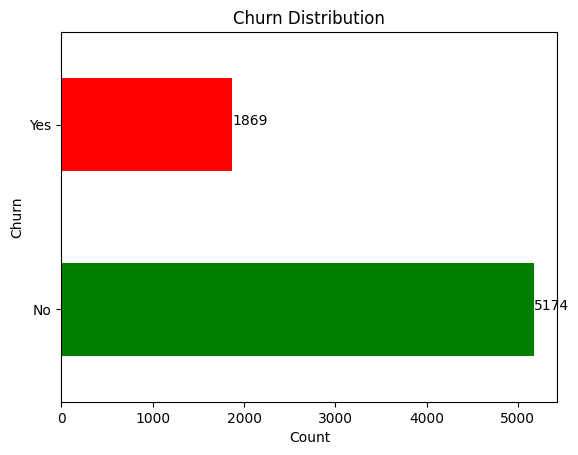

In [26]:
data1["Churn"].value_counts().plot(kind="barh", color=['green','red'])

for index, value in enumerate(data1["Churn"].value_counts()):
    plt.text(value, index, str(value))

plt.xlabel("Count")
plt.ylabel("Churn")
plt.title("Churn Distribution")
plt.show()


Exploratory Data Analysis (EDA)

In [27]:
data1.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2285.169963
std,0.368612,24.559481,30.090047,2267.544511
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.675000
50%,0.000000,29.000000,70.350000,1398.250000
75%,0.000000,55.000000,89.850000,3803.050000
max,1.000000,72.000000,118.750000,8684.800000


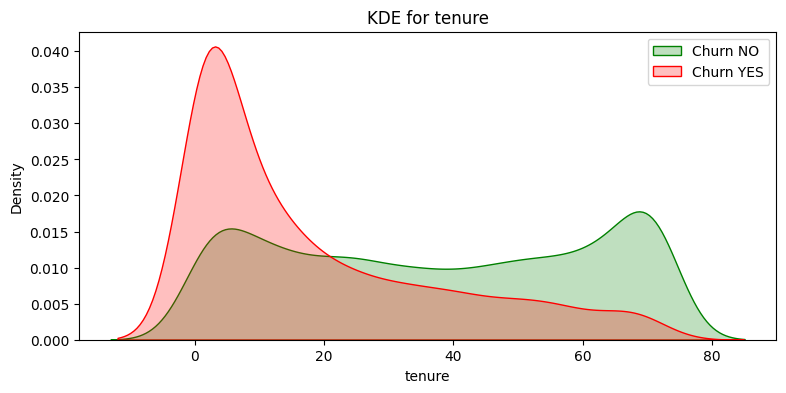

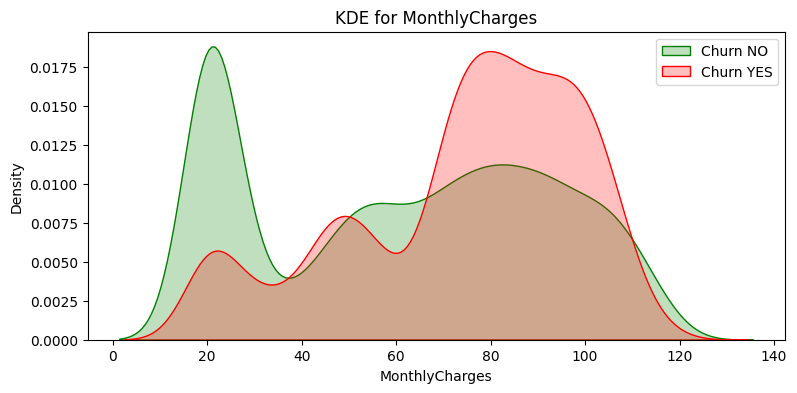

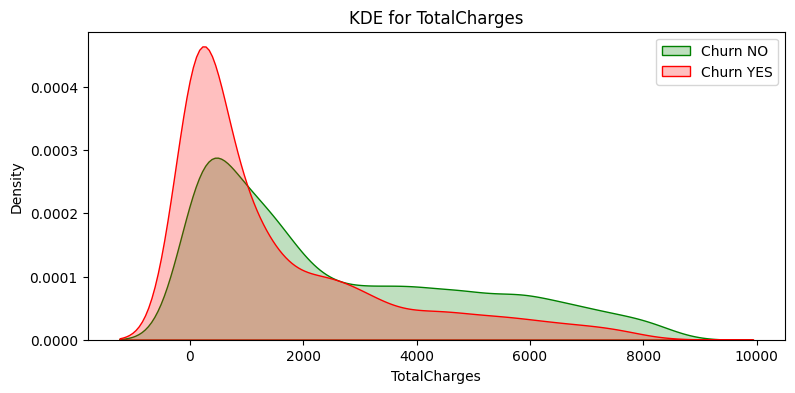

In [28]:
def kdplot(feature):
  plt.figure(figsize=(9,4))
  plt.title(f"KDE for {feature}")

  ax0=sns.kdeplot(data1[data1['Churn']=="No"][feature].dropna(),color="green",label='Churn NO',shade=True)
  ax1=sns.kdeplot(data1[data1['Churn']=="Yes"][feature].dropna(),color='red', label='Churn YES',shade=True)

  plt.legend()
  plt.show()


kdplot('tenure')
kdplot('MonthlyCharges')
kdplot('TotalCharges')


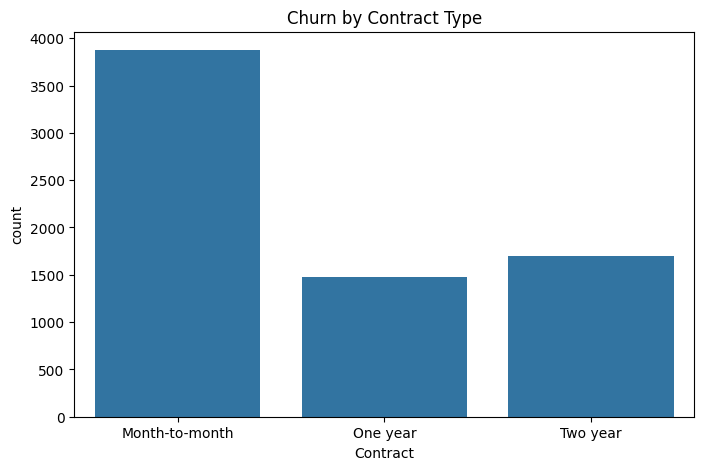

In [29]:
plt.figure(figsize=(8,5))
sns.countplot(x='Contract',data=data1)
plt.title("Churn by Contract Type")
plt.show()


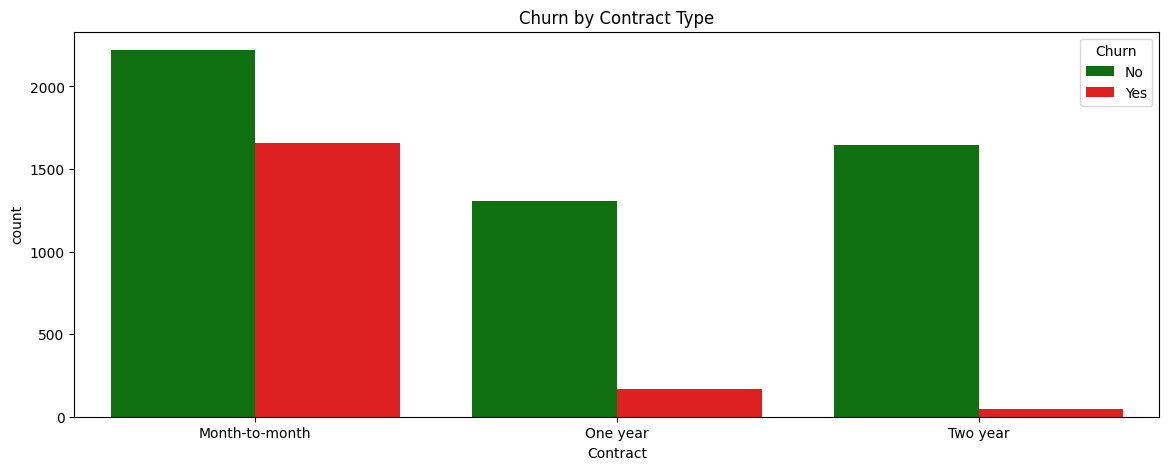

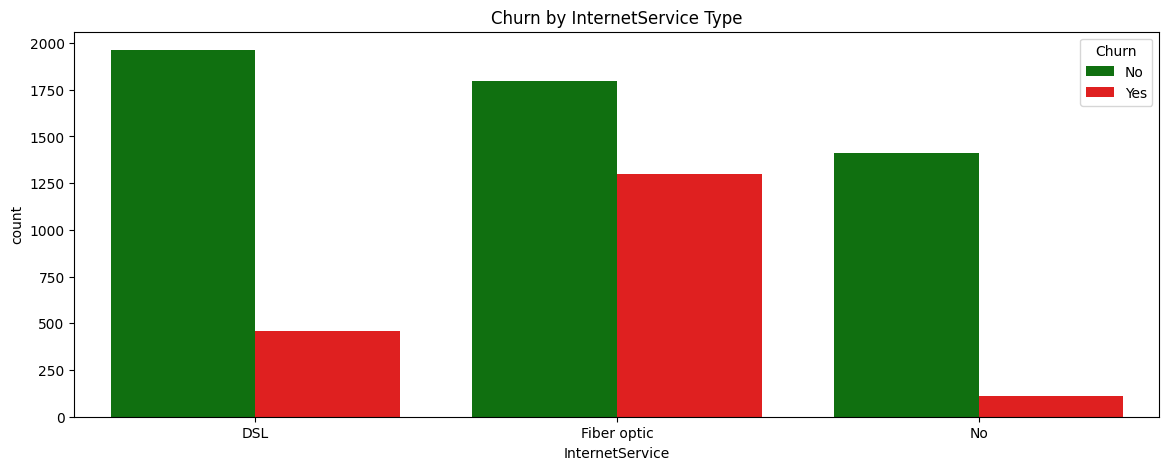

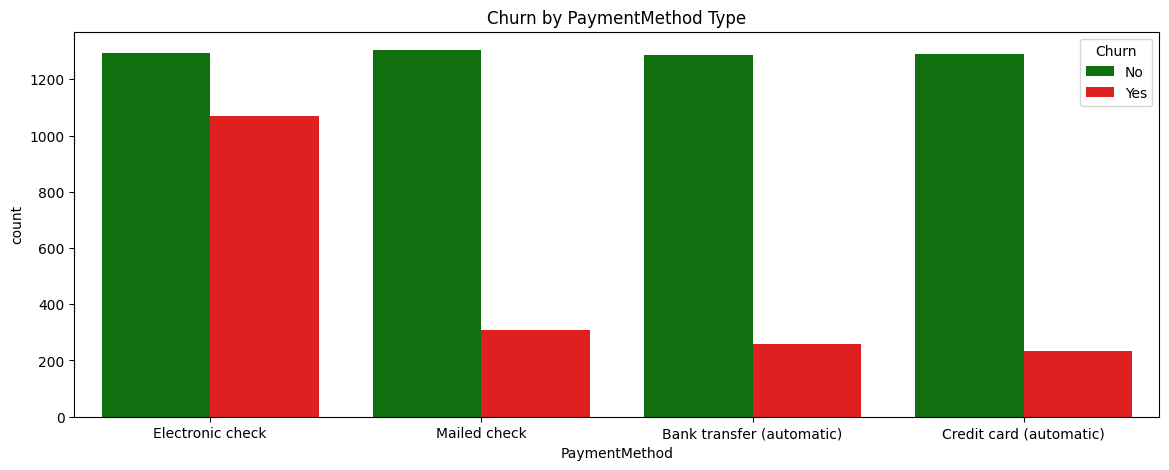

In [30]:
def churnGraphMultiple(feature):
  plt.figure(figsize=(14,5))
  sns.countplot(x=feature,hue='Churn',data=data1, palette=['green','red'])
  plt.title(f"Churn by {feature} Type")
  plt.show()


churnGraphMultiple('Contract')
churnGraphMultiple('InternetService')
churnGraphMultiple("PaymentMethod")



# more churning rate in month to month data


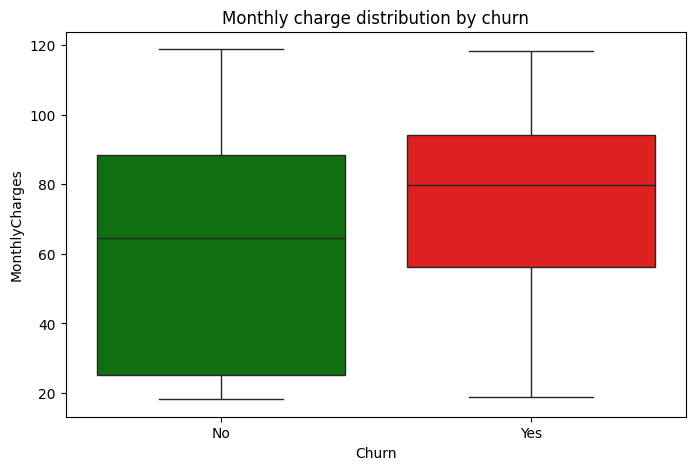

In [31]:
# now we are checking the month to month data   centre line showing mean
plt.figure(figsize=(8,5))
sns.boxplot(x='Churn',y='MonthlyCharges',data=data1, palette=['green','red'])
plt.title("Monthly charge distribution by churn")
plt.show()

cleaning categorical data

In [32]:
unique_columns(data1)

gender:['Female' 'Male']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No phone service' 'No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes' 'No internet service']
OnlineBackup:['Yes' 'No' 'No internet service']
DeviceProtection:['No' 'Yes' 'No internet service']
TechSupport:['No' 'Yes' 'No internet service']
StreamingTV:['No' 'Yes' 'No internet service']
StreamingMovies:['No' 'Yes' 'No internet service']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn:['No' 'Yes']


In [33]:
data1.replace('No phone service','No',inplace=True)
data1.replace('No internet service','No',inplace=True)




In [34]:
unique_columns(data1)


gender:['Female' 'Male']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes']
OnlineBackup:['Yes' 'No']
DeviceProtection:['No' 'Yes']
TechSupport:['No' 'Yes']
StreamingTV:['No' 'Yes']
StreamingMovies:['No' 'Yes']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn:['No' 'Yes']


In [35]:
yes_no_columns=['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity',
                'OnlineBackup','DeviceProtection',
                'TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    data1[col]=data1[col].replace({'Yes':1,'No':0})

In [36]:
unique_columns(data1)


gender:['Female' 'Male']
InternetService:['DSL' 'Fiber optic' 'No']
Contract:['Month-to-month' 'One year' 'Two year']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [37]:
data1['gender']=data1['gender'].replace({'Female':0,'Male':1})

In [38]:
unique_columns(data1)


InternetService:['DSL' 'Fiber optic' 'No']
Contract:['Month-to-month' 'One year' 'Two year']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [39]:
# now we are applying one hot encoding
data2=pd.get_dummies(data=data1,columns=['InternetService','Contract','PaymentMethod'],dtype=int)

In [40]:
data1.dtypes

,0
gender,int64
SeniorCitizen,int64
Partner,int64
Dependents,int64
tenure,int64
PhoneService,int64
MultipleLines,int64
InternetService,object
OnlineSecurity,int64
OnlineBackup,int64


In [41]:
unique_columns(data2)

In [42]:
data2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [43]:
print("columns are: \n")
def changescolumns(data2):
    for column in data2:
        print(f'{column}:{data2[column].unique()}')

changescolumns(data2)

columns are: 

gender:[0 1]
SeniorCitizen:[0 1]
Partner:[1 0]
Dependents:[0 1]
tenure:[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService:[0 1]
MultipleLines:[0 1]
OnlineSecurity:[0 1]
OnlineBackup:[1 0]
DeviceProtection:[0 1]
TechSupport:[0 1]
StreamingTV:[0 1]
StreamingMovies:[0 1]
PaperlessBilling:[1 0]
MonthlyCharges:[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges:[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn:[0 1]
InternetService_DSL:[1 0]
InternetService_Fiber optic:[0 1]
InternetService_No:[0 1]
Contract_Month-to-month:[1 0]
Contract_One year:[0 1]
Contract_Two year:[0 1]
PaymentMethod_Bank transfer (automatic):[0 1]
PaymentMethod_Credit card (automatic):[0 1]
PaymentMethod_Electronic check:[1 0]
PaymentMethod_Mailed check:[0 1]


In [44]:
print(len(data2.columns))


print(data2.head())

27
   gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       1             0   
1       1              0        0           0      34             1   
2       1              0        0           0       2             1   
3       1              0        0           0      45             0   
4       0              0        0           0       2             1   

   MultipleLines  OnlineSecurity  OnlineBackup  DeviceProtection  ...  \
0              0               0             1                 0  ...   
1              0               1             0                 1  ...   
2              0               1             1                 0  ...   
3              0               1             0                 1  ...   
4              0               0             0                 0  ...   

   InternetService_DSL  InternetService_Fiber optic  InternetService_No  \
0                    1                            0     

In [45]:
columnsScaling=['tenure','MonthlyCharges','TotalCharges']
from sklearn.preprocessing import MinMaxScaler
scalervalue=MinMaxScaler()
data2[columnsScaling]=scalervalue.fit_transform(data2[columnsScaling])

changescolumns(data2)

gender:[0 1]
SeniorCitizen:[0 1]
Partner:[1 0]
Dependents:[0 1]
tenure:[0.01388889 0.47222222 0.02777778 0.625      0.11111111 0.30555556
 0.13888889 0.38888889 0.86111111 0.18055556 0.22222222 0.80555556
 0.68055556 0.34722222 0.95833333 0.72222222 0.98611111 0.29166667
 0.16666667 0.41666667 0.65277778 1.         0.23611111 0.375
 0.06944444 0.63888889 0.15277778 0.97222222 0.875      0.59722222
 0.20833333 0.83333333 0.25       0.91666667 0.125      0.04166667
 0.43055556 0.69444444 0.88888889 0.77777778 0.09722222 0.58333333
 0.48611111 0.66666667 0.40277778 0.90277778 0.52777778 0.94444444
 0.44444444 0.76388889 0.51388889 0.5        0.56944444 0.08333333
 0.05555556 0.45833333 0.93055556 0.31944444 0.79166667 0.84722222
 0.19444444 0.27777778 0.73611111 0.55555556 0.81944444 0.33333333
 0.61111111 0.26388889 0.75       0.70833333 0.36111111 0.
 0.54166667]
PhoneService:[0 1]
MultipleLines:[0 1]
OnlineSecurity:[0 1]
OnlineBackup:[1 0]
DeviceProtection:[0 1]
TechSupport:[0 1]
Strea

In [46]:
data2.dtypes

,0
gender,int64
SeniorCitizen,int64
Partner,int64
Dependents,int64
tenure,float64
PhoneService,int64
MultipleLines,int64
OnlineSecurity,int64
OnlineBackup,int64
DeviceProtection,int64


In [47]:
#  now spliting feature and target variable
X = data2.drop(columns=["Churn"])
y = data2["Churn"]

In [48]:
X

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,0.013889,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,0.472222,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,0.027778,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,0.625000,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,0.027778,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,0.333333,1,1,1,0,1,...,1,0,0,0,1,0,0,0,0,1
7039,0,0,1,1,1.000000,1,1,0,1,1,...,0,1,0,0,1,0,0,1,0,0
7040,0,0,1,1,0.152778,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
7041,1,1,1,0,0.055556,1,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1


In [49]:
y

,Churn
0,0
1,0
2,1
3,0
4,1
...,...
7038,0
7039,0
7040,0
7041,1


In [50]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
# random state for reproducibility.

In [51]:
X_train.shape

(5634, 26)

In [52]:
X_test.shape

(1409, 26)

In [53]:
y_train.shape

(5634,)

In [54]:
y_test.shape

(1409,)

In [55]:
print(y_train.value_counts())

Churn
0    4138
1    1496
Name: count, dtype: int64


Handling imbalance dataset using smote

In [56]:

smote=SMOTE(random_state=42)
X_train_smote,y_train_smote=smote.fit_resample(X_train,y_train)


In [57]:
print(y_train_smote.value_counts())

Churn
0    4138
1    4138
Name: count, dtype: int64


In [60]:
# training and evaluating  SVM
svc_model_normal=SVC(random_state=42)
svc_model_smote=SVC(random_state=42)
svc_model_normal.fit(X_train,y_train)
svc_model_smote.fit(X_train_smote,y_train_smote)


print("svm train accuracy normal is: ",svc_model_normal.score(X_train,y_train)*100)
print("svm train accuracy smote is: ",svc_model_smote.score(X_train_smote,y_train_smote)*100)


accuracy_svc_normal=svc_model_normal.score(X_test,y_test)
accuracy_svc_smote=svc_model_smote.score(X_test,y_test)
print("svm accuracy normal is: ",accuracy_svc_normal*100)
print("svm accuracy smote is: ",accuracy_svc_smote*100)


svm train accuracy normal is:  81.73588924387647
svm train accuracy smote is:  83.3856935717738
svm accuracy normal is:  81.5471965933286
svm accuracy smote is:  76.86302342086586


In [61]:
from sklearn.metrics import classification_report
# Predictions on test data
y_pred_normal = svc_model_normal.predict(X_test)
y_pred_smote  = svc_model_smote.predict(X_test)

print("=== Normal Model Classification Report ===")
print(classification_report(y_test, y_pred_normal))

print("=== SMOTE Model Classification Report ===")
print(classification_report(y_test, y_pred_smote))

# print("=== Normal Model Confusion Matrix ===")
# print(confusion_matrix(y_test, y_pred_normal))

# print("=== SMOTE Model Confusion Matrix ===")
# print(confusion_matrix(y_test, y_pred_smote))

=== Normal Model Classification Report ===
              precision    recall  f1-score   support

           0       0.85      0.92      0.88      1036
           1       0.70      0.54      0.61       373

    accuracy                           0.82      1409
   macro avg       0.77      0.73      0.74      1409
weighted avg       0.81      0.82      0.81      1409

=== SMOTE Model Classification Report ===
              precision    recall  f1-score   support

           0       0.90      0.77      0.83      1036
           1       0.54      0.76      0.64       373

    accuracy                           0.77      1409
   macro avg       0.72      0.77      0.73      1409
weighted avg       0.81      0.77      0.78      1409



=== Normal Model Confusion Matrix ===
<class 'tensorflow.python.framework.ops.EagerTensor'>


Text(0.5, 1.0, 'Confusion Matrix')

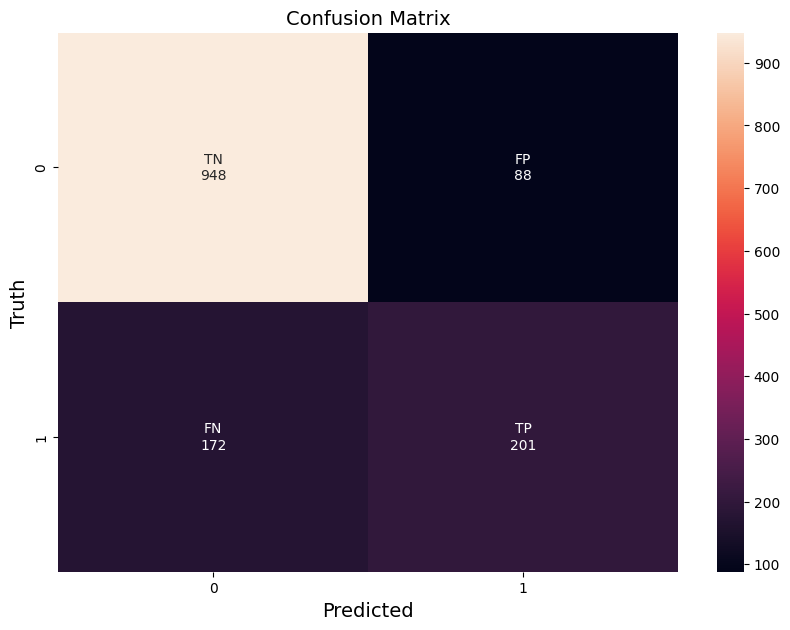

In [65]:
import seaborn as sn
import tensorflow as tf
print("=== Normal Model Confusion Matrix ===")
labels = np.array([["TN", "FP"],
                   ["FN", "TP"]])
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_pred_normal)
print(type(cm))
# now convert tensor into numpy array
cm=cm.numpy()
annot = np.array([[f"{labels[i, j]}\n{cm[i, j]}" for j in range(2)] for i in range(2)])
plt.figure(figsize=(10,7))
# sn.heatmap(cm,annot=True,fmt='d')
sn.heatmap(cm, annot=annot, fmt="")
plt.xlabel('Predicted',fontsize=14)
plt.ylabel('Truth',fontsize=14)
plt.title("Confusion Matrix", fontsize=14)

=== Normal Model Confusion Matrix ===
<class 'tensorflow.python.framework.ops.EagerTensor'>


Text(0.5, 1.0, 'Confusion Matrix')

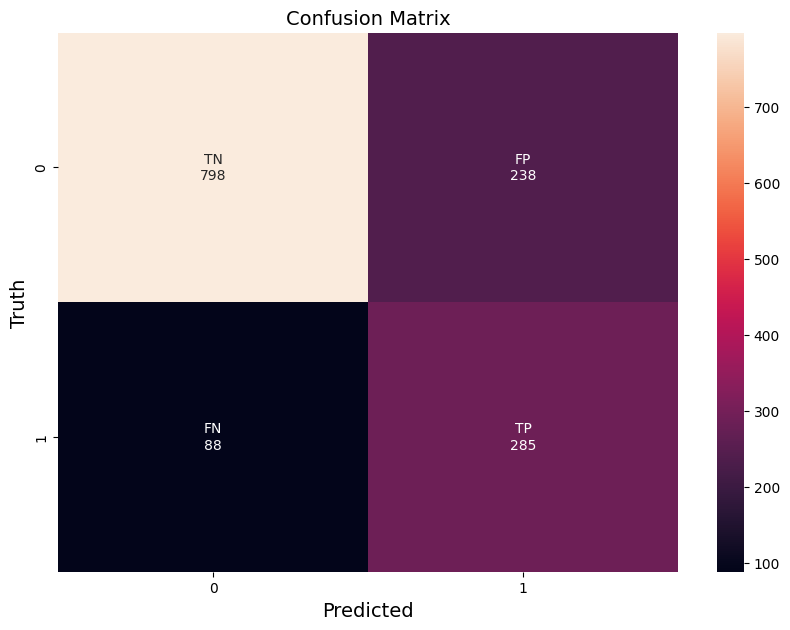

In [66]:

print("=== Normal Model Confusion Matrix ===")
labels = np.array([["TN", "FP"],
                   ["FN", "TP"]])
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_pred_smote)
print(type(cm))
# now convert tensor into numpy array
cm=cm.numpy()
annot = np.array([[f"{labels[i, j]}\n{cm[i, j]}" for j in range(2)] for i in range(2)])
plt.figure(figsize=(10,7))
# sn.heatmap(cm,annot=True,fmt='d')
sn.heatmap(cm, annot=annot, fmt="")
plt.xlabel('Predicted',fontsize=14)
plt.ylabel('Truth',fontsize=14)
plt.title("Confusion Matrix", fontsize=14)

In [67]:
rf_model_normal=RandomForestClassifier(verbose=1,random_state=42, oob_score=True, ccp_alpha=0.001)
rf_model_smote=RandomForestClassifier(verbose=1,random_state=42, oob_score=True, ccp_alpha=0.001)
# rf_model.fit(X_train_smote,y_train_smote)
# accuracy_rf=rf_model.score(X_test,y_test)
# print("random forest accuracy is: ",accuracy_rf*100)





rf_model_normal.fit(X_train,y_train)
rf_model_smote.fit(X_train_smote,y_train_smote)


print("rf train accuracy normal is: ",rf_model_normal.score(X_train,y_train)*100)
print("rf train accuracy smote is: ",rf_model_smote.score(X_train_smote,y_train_smote)*100)


accuracy_rf_normal=rf_model_normal.score(X_test,y_test)
accuracy_rf_smote=rf_model_smote.score(X_test,y_test)
print("rf accuracy normal is: ",accuracy_rf_normal*100)
print("rf accuracy smote is: ",accuracy_rf_smote*100)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.8s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.9s finished
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.5s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    3.0s finished


rf train accuracy normal is:  80.90166844160454
rf train accuracy smote is:  79.68825519574673
rf accuracy normal is:  80.55358410220013
rf accuracy smote is:  76.86302342086586


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


In [68]:
# without batch normalization
import tensorflow
# from tensorflow import keras
# from keras import Sequential
# from keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization
from keras.models import Model
from keras.layers import Input,concatenate
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical


In [69]:
from tensorflow.keras.layers import Dropout
# Input layer (26 features)
inputs = Input(shape=(26,))

# First branch
# First branch
hidden1 = Dense(128, activation='relu')(inputs)
hidden1 = Dropout(0.3)(hidden1)
hidden11 = Dense(64, activation='relu')(hidden1)
hidden11 = Dropout(0.3)(hidden11)

# Second branch
hidden2 = Dense(256, activation='relu')(inputs)
hidden2 = Dropout(0.3)(hidden2)

# Merge
merged = concatenate([hidden11, hidden2])


# Output layer (binary classification like your Sequential example)
output = Dense(1, activation='sigmoid')(merged)

model = Model(inputs=inputs, outputs=output)

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)
# epochs = int(input("Enter the Epochs value: "))
history1=model.fit(X_train_smote,y_train_smote,epochs=100,validation_split=0.2)

Epoch 1/100
207/207 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7277 - loss: 0.5193 - val_accuracy: 0.6993 - val_loss: 0.6410
Epoch 2/100
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7741 - loss: 0.4765 - val_accuracy: 0.6842 - val_loss: 0.6527
Epoch 3/100
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7737 - loss: 0.4681 - val_accuracy: 0.7216 - val_loss: 0.5965
Epoch 4/100
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7718 - loss: 0.4600 - val_accuracy: 0.7114 - val_loss: 0.5951
Epoch 5/100
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7753 - loss: 0.4593 - val_accuracy: 0.7729 - val_loss: 0.5141
Epoch 6/100
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7790 - loss: 0.4580 - val_accuracy: 0.7814 - val_loss: 0.4840
Epoch 7/100
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7920 - loss: 0.4342 - val_accuracy: 0.7663 - val_loss: 0.5135
Epoch 8/100
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7839 - loss: 0.4350 - val_accu

In [70]:
score1=model.evaluate(X_test, y_test, verbose=1)
print(score1)

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7758 - loss: 0.5132
[0.5327509045600891, 0.7721788287162781]


In [71]:
yp=model.predict(X_test)
yp[:5]

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[8.2114619e-01],
       [1.1677153e-02],
       [1.1296355e-05],
       [7.9285777e-01],
       [1.4144680e-01]], dtype=float32)

In [72]:
y_test[:5]

,Churn
185,1
2715,0
3825,0
1807,1
132,0


In [73]:
y_pred=[]
for element in yp:
    if element>0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)


y_pred

[1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,


In [74]:
y_test[:10]


,Churn
185,1
2715,0
3825,0
1807,1
132,0
1263,1
3732,0
1672,0
811,1
2526,1


In [75]:
y_pred[:10]

[1, 0, 0, 1, 0, 0, 0, 0, 0, 0]

<class 'tensorflow.python.framework.ops.EagerTensor'>


Text(0.5, 1.0, 'Confusion Matrix')

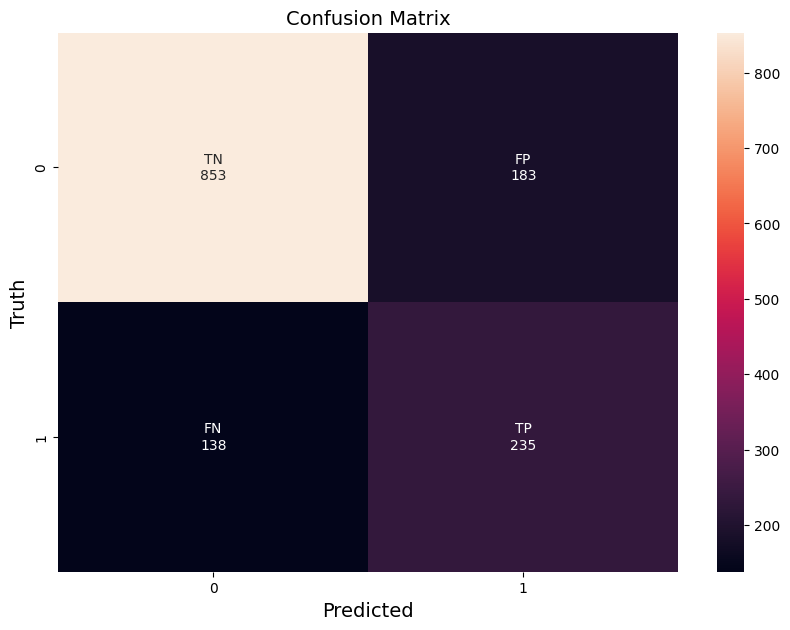

In [76]:

labels = np.array([["TN", "FP"],
                   ["FN", "TP"]])
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_pred)
print(type(cm))
# now convert tensor into numpy array
cm=cm.numpy()
annot = np.array([[f"{labels[i, j]}\n{cm[i, j]}" for j in range(2)] for i in range(2)])
plt.figure(figsize=(10,7))
# sn.heatmap(cm,annot=True,fmt='d')
sn.heatmap(cm, annot=annot, fmt="")
plt.xlabel('Predicted',fontsize=14)
plt.ylabel('Truth',fontsize=14)
plt.title("Confusion Matrix", fontsize=14)

In [77]:

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score,classification_report

accuracy = accuracy_score(y_test, y_pred)
precision_class_0 = precision_score(y_test, y_pred, pos_label=0)
precision_class_1 = precision_score(y_test, y_pred, pos_label=1)

print("Accuracy:", accuracy)
print("Precision (Class 0):", precision_class_0)
print("Precision (Class 1):", precision_class_1)

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"]))


Accuracy: 0.7721788502484032
Precision (Class 0): 0.8607467204843592
Precision (Class 1): 0.562200956937799

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.86      0.82      0.84      1036
     Class 1       0.56      0.63      0.59       373

    accuracy                           0.77      1409
   macro avg       0.71      0.73      0.72      1409
weighted avg       0.78      0.77      0.78      1409

